**Q1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**


Anomaly Detection refers to identifying rare items, events or observations which raise suspicions by differing significantly from the majority of the data.

**Types of anomalies:**
- **Point Anomaly**: A single instance is anomalous with respect to the rest of the data.  
  *Example*: In credit card transactions, a sudden purchase of $10,000 from a customer who typically spends less than $100.
- **Contextual Anomaly**: The anomaly is context-specific.  
  *Example*: A temperature of 30°C may be normal in summer but anomalous in winter.
- **Collective Anomaly**: A collection of related data instances is anomalous.  
  *Example*: A sequence of similar network requests that may indicate a DDoS attack.
        

**Q2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**


| Method             | Approach                                     | Suitable Use Cases                        |
|--------------------|----------------------------------------------|-------------------------------------------|
| Isolation Forest   | Randomly isolates data points                | High-dimensional data, scalable anomaly detection |
| DBSCAN             | Density-based clustering                     | Spatial or cluster-based anomalies         |
| Local Outlier Factor | Measures local deviation of density        | Detecting local density-based anomalies    |
        

**Q3: What are the key components of a Time Series? Explain each with one example.**


Key components of a time series:
- **Trend**: Long-term increase or decrease.  
  *Example*: Gradual increase in sales over years.
- **Seasonality**: Repeating short-term cycle.  
  *Example*: Higher ice cream sales in summer.
- **Noise/Residual**: Irregular fluctuations.  
  *Example*: Random spikes due to promotions.
        

**Q4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**


A stationary time series has statistical properties like mean, variance constant over time.

**Tests**: Augmented Dickey-Fuller (ADF), KPSS test.  
**Transformation**: Differencing, log transform.
        

**Q5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**


| Model   | Description                      | Application                               |
|---------|----------------------------------|-------------------------------------------|
| AR      | Autoregressive                   | Based on past values                      |
| MA      | Moving Average                   | Based on past forecast errors             |
| ARIMA   | AR + MA + Integration            | Non-stationary data forecasting           |
| SARIMA  | Seasonal ARIMA                   | Seasonal patterns in data                 |
| SARIMAX | SARIMA + Exogenous variables     | External regressors included              |
        

# Practical

**Q6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.**

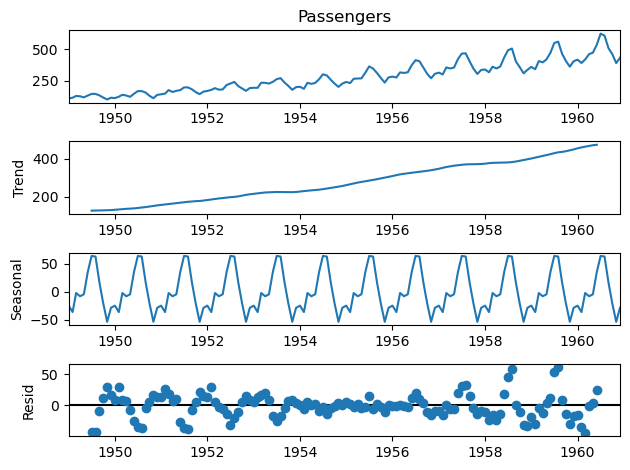

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.datasets import get_rdataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', parse_dates=['Month'], index_col='Month')

decomposition = seasonal_decompose(data['Passengers'], model='additive')
decomposition.plot()
plt.show()

**Q7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.**

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('NYC_taxi_fare_data.csv')
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [4]:
features = ['trip_distance', 'fare_amount', 'passenger_count', 'tip_amount', 'total_amount']
df = data[features].copy()

df.dropna(inplace=True)

# remove invalid or zero trips
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['total_amount'] > 0)]
df

,trip_distance,fare_amount,passenger_count,tip_amount,total_amount
0,1.20,6.0,1.0,1.47,11.27
1,1.20,7.0,1.0,1.50,12.30
2,0.60,6.0,1.0,1.00,10.80
3,0.80,5.5,1.0,1.36,8.16
5,0.03,2.5,1.0,0.00,3.80
...,...,...,...,...,...
6339561,4.11,17.5,1.0,4.26,25.56
6339562,2.10,11.0,1.0,2.96,17.76
6339563,2.13,13.0,1.0,3.36,20.16
6339564,2.55,12.5,1.0,3.26,19.56


In [5]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['anomaly'] = iso.fit_predict(df)

print(df['anomaly'].value_counts())

 1    6191024
-1      62510
Name: anomaly, dtype: int64


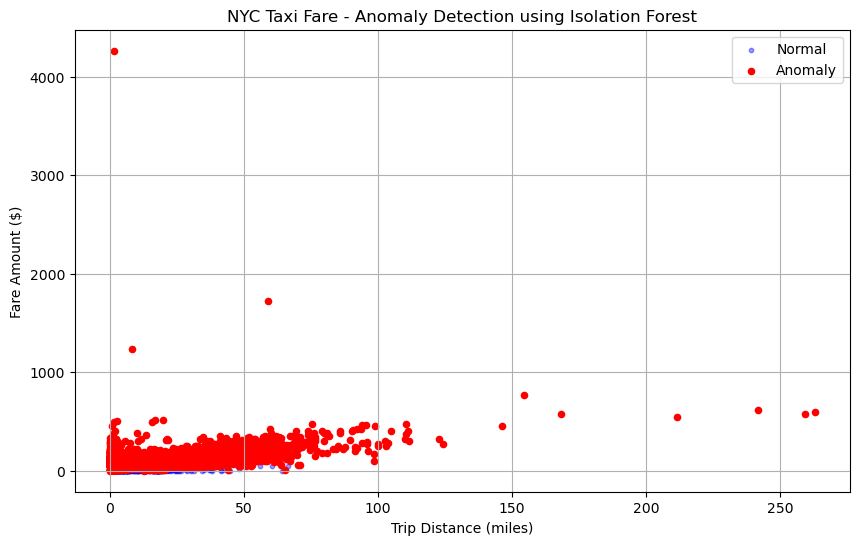

In [6]:
import matplotlib.pyplot as plt

normal = df[df['anomaly'] == 1]
anomalies = df[df['anomaly'] == -1]

plt.figure(figsize=(10, 6))
plt.scatter(normal['trip_distance'], normal['fare_amount'], 
            c='blue', label='Normal', s=10, alpha=0.4)
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'], 
            c='red', label='Anomaly', s=20)

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("NYC Taxi Fare - Anomaly Detection using Isolation Forest")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df[df['anomaly']==-1]

,trip_distance,fare_amount,passenger_count,tip_amount,total_amount,anomaly
419,23.47,61.5,1.0,12.56,75.36,-1
649,17.20,52.0,2.0,18.40,79.82,-1
687,22.80,66.5,2.0,2.22,70.02,-1
790,37.61,144.0,2.0,0.00,157.80,-1
1191,20.32,62.5,4.0,0.00,66.30,-1
...,...,...,...,...,...,...
6338509,31.00,110.0,1.0,0.00,116.42,-1
6338773,18.30,52.0,3.0,13.50,81.04,-1
6338862,26.87,89.5,1.0,0.00,102.05,-1
6339235,27.35,71.5,1.0,10.00,82.80,-1


In [8]:
df[df['anomaly']==1]

,trip_distance,fare_amount,passenger_count,tip_amount,total_amount,anomaly
0,1.20,6.0,1.0,1.47,11.27,1
1,1.20,7.0,1.0,1.50,12.30,1
2,0.60,6.0,1.0,1.00,10.80,1
3,0.80,5.5,1.0,1.36,8.16,1
5,0.03,2.5,1.0,0.00,3.80,1
...,...,...,...,...,...,...
6339561,4.11,17.5,1.0,4.26,25.56,1
6339562,2.10,11.0,1.0,2.96,17.76,1
6339563,2.13,13.0,1.0,3.36,20.16,1
6339564,2.55,12.5,1.0,3.26,19.56,1


**Q8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.**

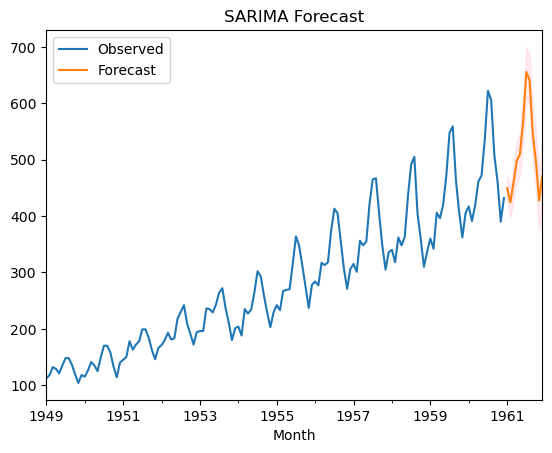

In [9]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', parse_dates=['Month'], index_col='Month')
model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()
forecast = result.get_forecast(steps=12)
pred_ci = forecast.conf_int()

data['Passengers'].plot(label='Observed')
forecast.predicted_mean.plot(label='Forecast')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title("SARIMA Forecast")
plt.show()
        

**Q9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.**

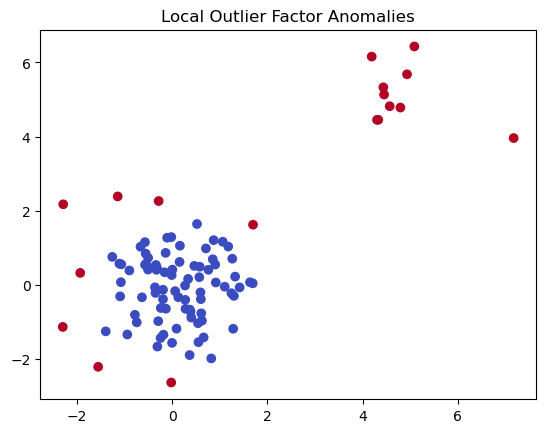

In [11]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

X = np.random.randn(100, 2)
X[90:] += 5  

lof = LocalOutlierFactor(n_neighbors=20)
labels = lof.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=(labels==-1), cmap='coolwarm')
plt.title("Local Outlier Factor Anomalies")
plt.show()    

**Q10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.**

**Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?**

1. Anomaly Detection in Streaming Data
To detect any unusual spikes or drops in energy usage every 15 minutes, I would go with Isolation Forest as my main anomaly detection method. It’s pretty efficient and works well even if the data doesn’t follow a standard pattern, which is often the case with real-world energy usage.

I’d use a sliding time window (maybe the last 24–48 hours) to constantly update the model and catch sudden changes. Each new data point would be checked in real time, and if the anomaly score is high, we’d flag it for further investigation.

If the data shows clustered patterns (like similar spikes in a particular region), DBSCAN could also be helpful since it’s good at finding group anomalies. But for streaming and speed, Isolation Forest is my first choice.

2. Forecasting Model for Short-Term Energy Demand
For forecasting, I’d use SARIMAX. It’s basically a seasonal ARIMA model that also lets you plug in external factors (like weather or region), which is perfect here because energy usage often depends a lot on those.

So, for example, I’d use past energy usage as the main series and add things like temperature, humidity, and the region as extra inputs (exogenous variables). This way, the model can learn that people in one region might use more electricity when it’s hot, while another might use more when it’s cold.

3. Validating and Monitoring the Model
To make sure the model is working properly over time, I’d track metrics like RMSE, MAE, or MAPE on the forecasts. I’d also use something like a rolling window validation, where the model keeps getting tested on the latest chunks of data.

In production, I’d monitor the model using a dashboard — maybe with tools like Grafana or Prometheus — to catch when the error rates go up, which could mean the model needs retraining.

Also, since data patterns can change (like seasonal demand or behavior after a holiday), I’d retrain the model every week or month.

4. Business Impact
Having a system like this in place would really help the business:

It helps prevent power outages by forecasting high-demand periods ahead of time.

Anomaly detection would allow quick responses to suspicious activity, like a sudden spike that might indicate equipment failure or unauthorized usage.

It would optimize energy production — so we don’t overproduce or underproduce — saving money and reducing waste.

Overall, it would make the system more reliable and efficient, which is great for both the company and the customers.

# ----------------------- Thank You --------------------